In [1]:
## Import libraries
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
import shapely.wkt
from itertools import permutations

%matplotlib inline

C:\Users\Hector\.conda\envs\DS4A_test\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
## Define the working directory. (This should be executed just once)
os.chdir(os.path.join('..'))
working_path = os.getcwd()

print('The working directory is {}'.format(working_path))

# Define the path where the data sets are located
datasets_path = os.path.join(working_path, 'Datasets')

print('The datasets folder is  {}'.format(datasets_path))

The working directory is C:\Users\Hector\Documents\DS4A_datathon
The datasets folder is  C:\Users\Hector\Documents\DS4A_datathon\Datasets


In [16]:
uber_trips = pd.read_csv(os.path.join(datasets_path, 'uber_processed.csv'), 
                         usecols=['pickup_datetime', 'affiliate_base', 'borough'])
uber_trips.head()

,pickup_datetime,affiliate_base,borough
0,2014-04-01 00:11:00,B02512,Manhattan
1,2014-04-01 00:17:00,B02512,Does not belong to any borough
2,2014-04-01 00:21:00,B02512,Manhattan
3,2014-04-01 00:28:00,B02512,Manhattan
4,2014-04-01 00:33:00,B02512,Manhattan


In [18]:
uber_trips.isna().sum()

pickup_datetime         0
affiliate_base     162195
borough              6264
dtype: int64

In [19]:
uber_trips[uber_trips.borough.isna()]

,pickup_datetime,affiliate_base,borough
4537973,2015-01-19 10:02:46,NaN,NaN
4544836,2015-03-28 11:39:00,B02682,NaN
4545372,2015-03-28 11:56:00,B02682,NaN
4546167,2015-03-17 08:46:00,B02764,NaN
4553161,2015-02-05 05:17:29,B02764,NaN
...,...,...,...
18797331,2015-05-08 10:27:00,B02765,NaN
18797774,2015-05-12 20:10:00,B01197,NaN
18800082,2015-05-12 20:36:00,B00014,NaN
18800747,2015-02-20 08:39:03,B02765,NaN


In [ ]:
uber_trips.sox

In [22]:
uber_trips.groupby('borough').count().sort_values('pickup_datetime', ascending=False)

,pickup_datetime,affiliate_base
borough,,
Manhattan,13814518,13695501
Brooklyn,2915594,2888561
Queens,1686170,1673956
Bronx,251730,248229
Does not belong to any borough,122432,122432
Staten Island,7993,7945
EWR,105,104


In [11]:
uber_trips.groupby('affiliate_base').count()

,pickup_datetime,borough
affiliate_base,,
B00013,29671,29661
B00014,38498,38489
B00035,2955,2955
B00039,13,13
B00053,39423,39408
...,...,...
B02843,905,905
B02845,11,11
B02846,1619,1619


In [1]:
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt

In [3]:
tips = sns.load_dataset('tips')

In [4]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


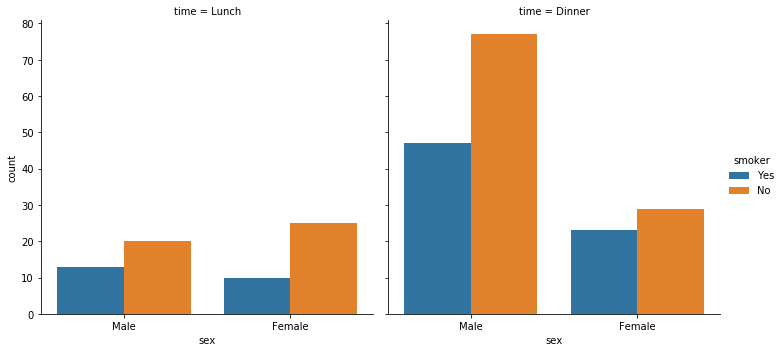

In [5]:
sns.catplot(x='sex', hue='smoker',
                                   kind='count',
                                   col='time',
                                   data=tips)
